## Knowing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
big_bills = pd.read_csv('D:/Project_Restaurant_Chain/Full/big_bills.csv')
restaurant_portfolio = pd.read_csv('D:/Project_Restaurant_Chain/Full/restaurant_portfolio.csv')

In [3]:
# total number of data
print("Number of Transactions:", len(big_bills.total_covers))

Number of Transactions: 5152404


In [4]:
big_bills.total_covers.describe()

count    5.152404e+06
mean     2.241724e+00
std      1.851398e+00
min     -4.200000e+01
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      9.990000e+02
Name: total_covers, dtype: float64

In [5]:
big_bills.total_covers.value_counts()

 2      2664767
 0       686332
 3       593012
 1       438699
 4       430710
 5       138641
 6        84673
 7        38721
 8        26245
 9        14816
 10       10575
 11        6520
 12        5020
 13        3207
 14        2534
 15        1889
 16        1396
 17         964
 18         731
 20         546
 19         542
 21         311
 22         257
 23         215
 24         150
 25         147
-1          135
 26          89
 27          71
 28          65
         ...   
 43           4
 42           4
 60           3
 50           3
-5            3
 52           3
 51           3
 500          2
 37           2
 54           2
 53           2
 55           2
 57           2
 61           1
 59           1
 48           1
-42           1
 999          1
 666          1
 56           1
 150          1
 102          1
 58           1
 84           1
 81           1
 70           1
 69           1
 65           1
 63           1
 62           1
Name: total_covers, dtyp

It must be noticed that in this dataset, there is surely some data that has problems.
1. Covers cannot be negative;
2. Large cover numbers are really not possible, for example 999;
3. Covers that have few transaction records are not valueble, for example, a cover number of 26 has only 89 records.

In [6]:
big_bills.total_covers.idxmax()

1930709

In [7]:
# Inspect the cover number of maximum
big_bills.iloc[1930709]

Unnamed: 0                           1930709
branch_number                           3298
concept_number                             1
revenue_centre_number                      1
brand                                 Prezzo
sale_date                         2016-10-31
guest_check_number                        62
check_datetimestart      2016-10-31 21:46:09
check_datetimestop       2016-10-31 21:58:17
total_covers                             999
total_gross_sales                      12.97
total_net_sales                       10.808
total_service_charge                     NaN
total_tip                                  0
total_discount                           NaN
total_cost                            -12.97
total_stock_cost                       1.173
total_tesco_rebate                       NaN
Name: 1930709, dtype: object

In [8]:
import seaborn as sns

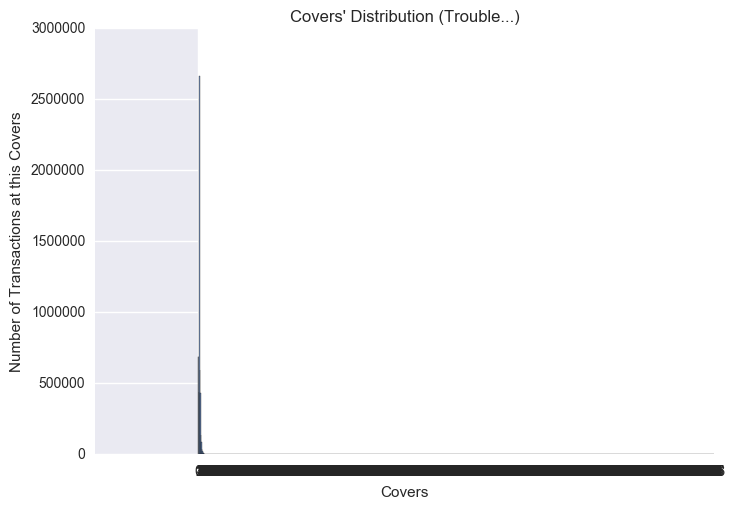

In [9]:
n_total, bins, patch = plt.hist(big_bills.total_covers, bins=np.arange(0,999,1),alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,999,1))
plt.title("Covers' Distribution (Trouble...)")
plt.xlabel('Covers')
plt.ylabel('Number of Transactions at this Covers')
plt.show()

### Select the data I think is useful
At this stage, I think limit the number of covers into 0-25 is sensible.

In [10]:
big_bills_selected = big_bills[(big_bills.total_covers>=0) & (big_bills.total_covers<26)]

In [11]:
big_bills_selected.head()

,Unnamed: 0,branch_number,concept_number,revenue_centre_number,brand,sale_date,guest_check_number,check_datetimestart,check_datetimestop,total_covers,total_gross_sales,total_net_sales,total_service_charge,total_tip,total_discount,total_cost,total_stock_cost,total_tesco_rebate
0,0,3338,1,2,Prezzo,2016-06-19,25,2016-06-19 13:57:47,2016-06-19 15:59:55,0,18.92,15.766,13.67,0.0,-90.0,57.41,1.149,45.25
1,1,2001,11,1,Prezzo,2016-06-19,7,2016-06-19 12:39:55,2016-06-19 22:18:13,0,0.00,0.000,NaN,NaN,NaN,0.00,NaN,NaN
2,2,3204,1,1,Prezzo,2016-06-19,10,2016-06-19 12:44:17,2016-06-19 16:27:22,0,0.00,0.000,NaN,NaN,NaN,0.00,1.127,NaN
3,3,2001,11,1,Prezzo,2016-06-19,50,2016-06-19 15:33:50,2016-06-19 16:44:04,0,0.00,0.000,NaN,NaN,NaN,0.00,NaN,NaN
4,4,3204,1,1,Prezzo,2016-06-19,20,2016-06-19 13:08:28,2016-06-19 13:54:32,0,0.00,0.000,NaN,NaN,NaN,0.00,3.488,NaN


In [12]:
# total number of selected data
print("Number of Transactions:", len(big_bills_selected.total_covers))

Number of Transactions: 5151620


Less than 1000 records are eliminated. And the way of selecting data is sensible.

In [13]:
big_bills_selected.total_covers.describe()

count    5.151620e+06
mean     2.237436e+00
std      1.689301e+00
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.500000e+01
Name: total_covers, dtype: float64

In [14]:
big_bills_selected.total_covers.value_counts()

2     2664767
0      686332
3      593012
1      438699
4      430710
5      138641
6       84673
7       38721
8       26245
9       14816
10      10575
11       6520
12       5020
13       3207
14       2534
15       1889
16       1396
17        964
18        731
20        546
19        542
21        311
22        257
23        215
24        150
25        147
Name: total_covers, dtype: int64

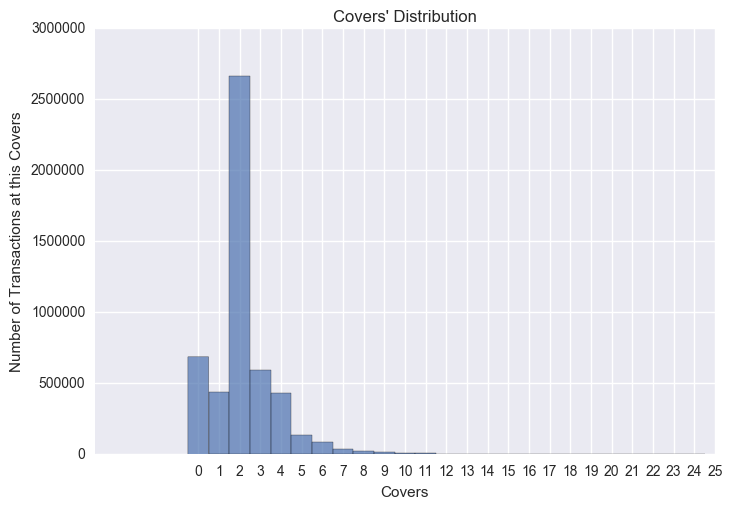

In [15]:
n_total, bins, patch = plt.hist(big_bills.total_covers, bins=np.arange(0,26,1),alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,26,1))
plt.title("Covers' Distribution")
plt.xlabel('Covers')
plt.ylabel('Number of Transactions at this Covers')
plt.show()

### A bit of statistics

In [16]:
import scipy

In [17]:
stat_covers_selected=pd.DataFrame({'Statistics of covers (original)':list(scipy.stats.describe(big_bills.total_covers))
                                   },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_covers_selected

,Statistics of covers (original)
nobs,5152404
min-max,"(-42, 999)"
mean,2.24172
variance,3.42767
skewness,51.8843
kurtosis,21813.8


In [18]:
stat_covers_selected=pd.DataFrame({'Statistics of covers':list(scipy.stats.describe(big_bills_selected.total_covers))
                                   },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_covers_selected

,Statistics of covers
nobs,5151620
min-max,"(0, 25)"
mean,2.23744
variance,2.85374
skewness,2.64941
kurtosis,16.5578


Binomial Distribution

By observing the characteristics, the probability distribution is very close to Binomial Distribution.
Binomial Distribution refers to a repeated test for N experiments, for each test, the outcome is either 'yes' or 'no', and there is need to know for many times the answer is 'yes'.
For this restaurant chain, we can make sure that every restaurant in this chain is a branch of Prezzo, and very roughly we can assume that food in every restaurant is the same, and let each cover (main dish) to be a single event (although it is not the same with the other item). And see how many covers are selected.

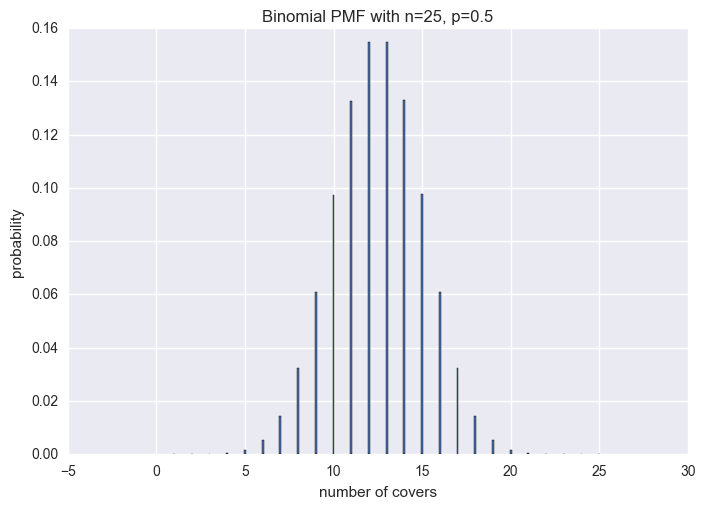

In [19]:
def plot_binomial(n,p):
    '''Plot probability function of binomial distribution'''
    sample = np.random.binomial(n,p,size=5000000)  # Produce 5000000 random numbers that fits the distribution
    bins = np.arange(n+2) 
    plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)  # Plot histogram
    #Set title and corodinates
    plt.title('Binomial PMF with n={}, p={}'.format(n,p))  
    plt.xlabel('number of covers')
    plt.ylabel('probability')


plot_binomial(25, 0.5)
plt.show()

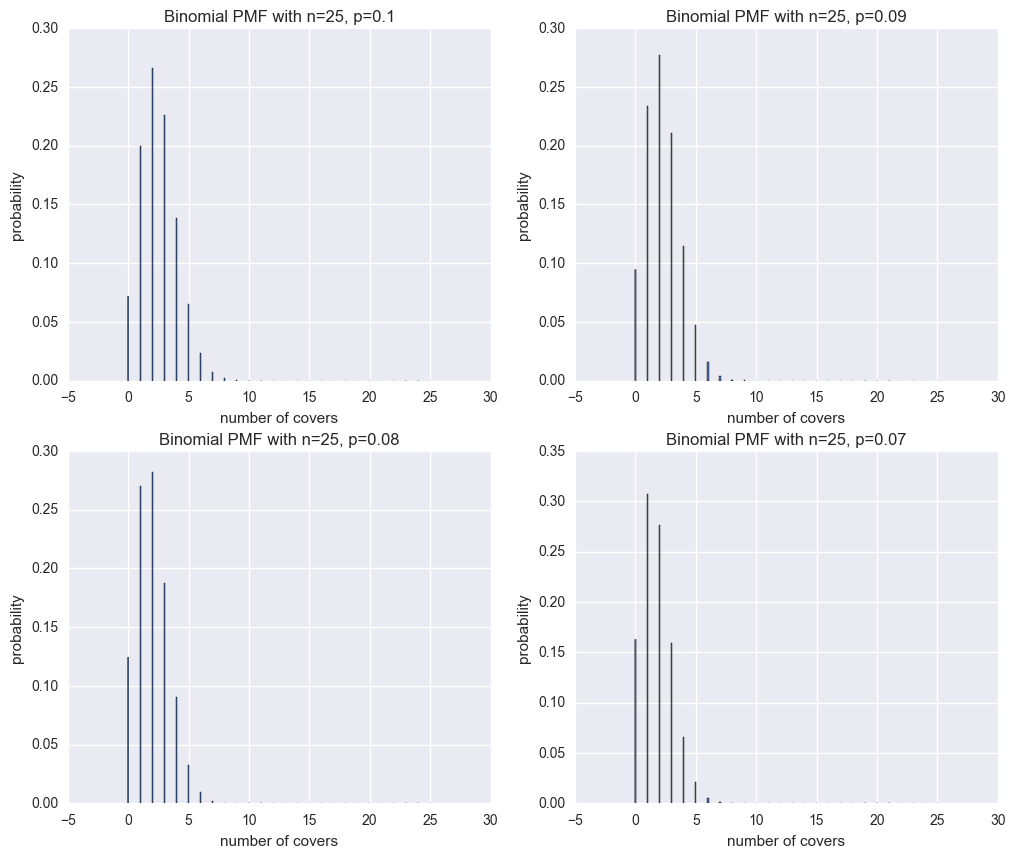

In [20]:
fig = plt.figure(figsize=(12,10)) #Set the size of the canvas
p1 = fig.add_subplot(221)  # First subplot
plot_binomial(25, 0.1)
p2 = fig.add_subplot(222)  # Second subplot
plot_binomial(25, 0.09)
p3 = fig.add_subplot(223)  # Third subplot
plot_binomial(25, 0.08)
p4 = fig.add_subplot(224)  # Fourth subplot
plot_binomial(25, 0.07)
plt.show()

So far the cover distribution is hard to fit, but the case when n=25, p=0.1, seems to be like the case.

## Merging two datasets

Find the common attributes for two datasets first

In [21]:
big_bills_selected.columns

Index(['Unnamed: 0', 'branch_number', 'concept_number',
       'revenue_centre_number', 'brand', 'sale_date', 'guest_check_number',
       'check_datetimestart', 'check_datetimestop', 'total_covers',
       'total_gross_sales', 'total_net_sales', 'total_service_charge',
       'total_tip', 'total_discount', 'total_cost', 'total_stock_cost',
       'total_tesco_rebate'],
      dtype='object')

In [22]:
restaurant_portfolio.columns

Index(['Unnamed: 0', 'branch_number', 'concept_number', 'post_code', 'town',
       'county', 'country', 'brand', 'location', 'description', 'region',
       'rating', 'company', 'status', 'total_seats', 'total_inside_seats',
       'ground_seats', '1st_floor_seats', 'conservatory_seats', 'bar_seats',
       'outside_seats', 'private_dining_covers', 'exec_employee_id',
       'ops_dir_employee_id', 'ops_area_employee_id', 'area_chef_employee_id',
       'ops_manager_employee_id'],
      dtype='object')

It seems that the attributes commonly appeared in the two datasets are two,‘branch_number' and ‘concept_number', but 'concept_number' is empty in the second dataset, so make 'branch_number' the key to merge.

In [23]:
merged_df = pd.merge(big_bills_selected, restaurant_portfolio, on='branch_number')

In [24]:
merged_df.head()

,Unnamed: 0_x,branch_number,concept_number_x,revenue_centre_number,brand_x,sale_date,guest_check_number,check_datetimestart,check_datetimestop,total_covers,...,1st_floor_seats,conservatory_seats,bar_seats,outside_seats,private_dining_covers,exec_employee_id,ops_dir_employee_id,ops_area_employee_id,area_chef_employee_id,ops_manager_employee_id
0,0,3338,1,2,Prezzo,2016-06-19,25,2016-06-19 13:57:47,2016-06-19 15:59:55,0,...,0.0,0.0,16.0,60.0,No,NaN,626.0,800078,NaN,999059.0
1,646,3338,1,1,Prezzo,2016-06-19,2,2016-06-19 13:05:28,2016-06-19 13:06:00,0,...,0.0,0.0,16.0,60.0,No,NaN,626.0,800078,NaN,999059.0
2,648,3338,1,1,Prezzo,2016-06-19,11,2016-06-19 16:29:55,2016-06-19 16:30:07,0,...,0.0,0.0,16.0,60.0,No,NaN,626.0,800078,NaN,999059.0
3,650,3338,1,1,Prezzo,2016-06-19,103,2016-06-19 20:19:09,2016-06-19 20:30:52,0,...,0.0,0.0,16.0,60.0,No,NaN,626.0,800078,NaN,999059.0
4,652,3338,1,1,Prezzo,2016-06-19,10,2016-06-19 12:52:23,2016-06-19 12:52:36,0,...,0.0,0.0,16.0,60.0,No,NaN,626.0,800078,NaN,999059.0


In [25]:
merged_df.columns

Index(['Unnamed: 0_x', 'branch_number', 'concept_number_x',
       'revenue_centre_number', 'brand_x', 'sale_date', 'guest_check_number',
       'check_datetimestart', 'check_datetimestop', 'total_covers',
       'total_gross_sales', 'total_net_sales', 'total_service_charge',
       'total_tip', 'total_discount', 'total_cost', 'total_stock_cost',
       'total_tesco_rebate', 'Unnamed: 0_y', 'concept_number_y', 'post_code',
       'town', 'county', 'country', 'brand_y', 'location', 'description',
       'region', 'rating', 'company', 'status', 'total_seats',
       'total_inside_seats', 'ground_seats', '1st_floor_seats',
       'conservatory_seats', 'bar_seats', 'outside_seats',
       'private_dining_covers', 'exec_employee_id', 'ops_dir_employee_id',
       'ops_area_employee_id', 'area_chef_employee_id',
       'ops_manager_employee_id'],
      dtype='object')

In [26]:
len(merged_df.columns)

44

Now the information in two different datasets has come into one. And the newly merged dataset must be observed carefully to see if some attributes must be discarded.

And now the region information is available, and we can inspect the covers distribution by country, England, Wales, Scotland. It seems that restaurants in Northern Ireland are not directly available. And the covers distribution across different regions may be studied.

In [28]:
#==================
country1="England"
country2="Wales"
country3="Scotland"
country4='Northern Ireland'
country5='Ireland'
#==================

In [29]:
country1_df = merged_df[merged_df.country == country1]

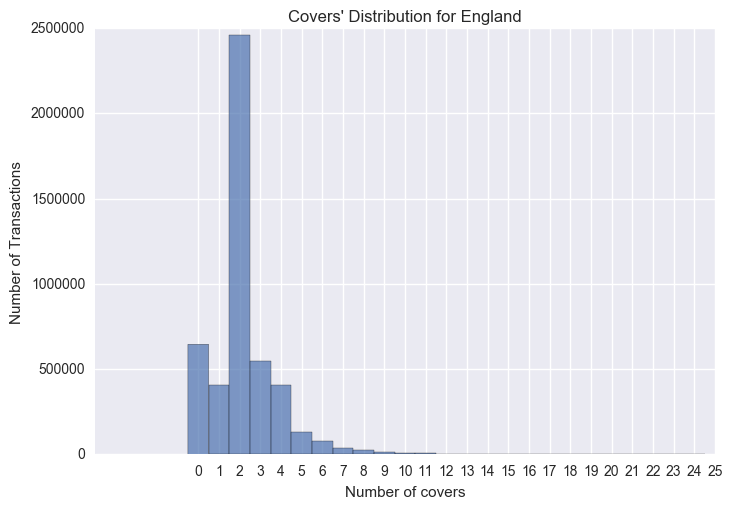

In [30]:
n_total, bins, patch = plt.hist(country1_df.total_covers, bins=np.arange(0,26,1), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,26,1))
plt.title("Covers' Distribution for {}".format(country1))
plt.xlabel('Number of covers')
plt.ylabel('Number of Transactions')
plt.show()

In [31]:
country2_df = merged_df[merged_df.country == country2]

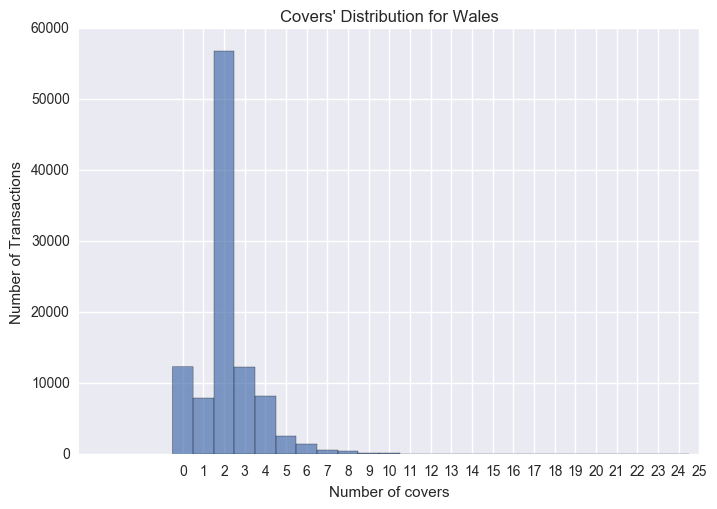

In [32]:
n_total, bins, patch = plt.hist(country2_df.total_covers, bins=np.arange(0,26,1), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,26,1))
plt.title("Covers' Distribution for {}".format(country2))
plt.xlabel('Number of covers')
plt.ylabel('Number of Transactions')
plt.show()

In [33]:
country3_df = merged_df[merged_df.country == country3]

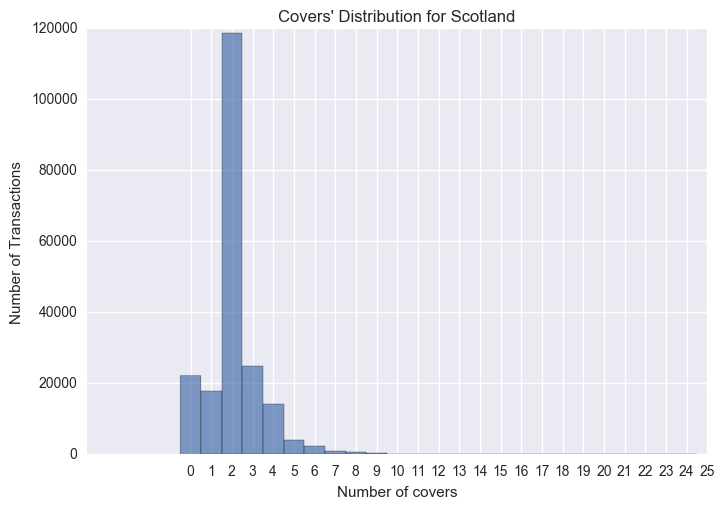

In [34]:
n_total, bins, patch = plt.hist(country3_df.total_covers, bins=np.arange(0,26,1), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,26,1))
plt.title("Covers' Distribution for {}".format(country3))
plt.xlabel('Number of covers')
plt.ylabel('Number of Transactions')
plt.show()

In [35]:
country4_df = merged_df[merged_df.country == country4]

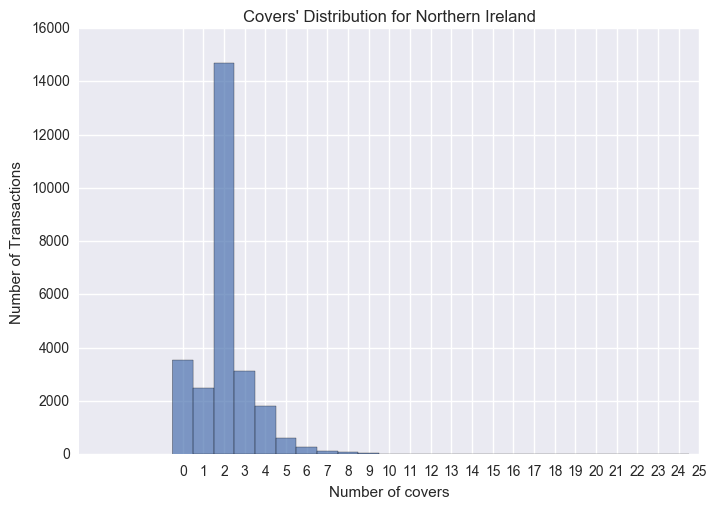

In [36]:
n_total, bins, patch = plt.hist(country4_df.total_covers, bins=np.arange(0,26,1), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,26,1))
plt.title("Covers' Distribution for {}".format(country4))
plt.xlabel('Number of covers')
plt.ylabel('Number of Transactions')
plt.show()

In [37]:
country5_df = merged_df[merged_df.country == country5]

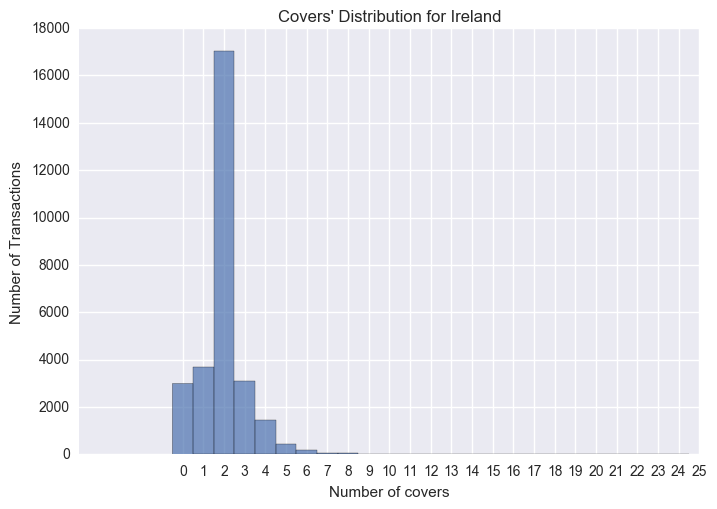

In [38]:
n_total, bins, patch = plt.hist(country5_df.total_covers, bins=np.arange(0,26,1), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(0,26,1))
plt.title("Covers' Distribution for {}".format(country5))
plt.xlabel('Number of covers')
plt.ylabel('Number of Transactions')
plt.show()

The three countries in the UK exhibit similar features on how many covers customers generally order for, but Ireland is a bit different.

And I may differentiate England by regions in later versions.

### Feature screening (manually)

Roughly, there are 43 'features' as candidates for the supervised learning model. However, we can clearly see that many of the attributes are registry information that means nothing and many data are missing. So there must be two steps as least for the preliminary model.

#### Attributes that are not meaningful

In [36]:
# branch number
branch_number_count = merged_df.branch_number.value_counts(dropna = False)
branch_number_count

3386    93219
3338    74334
3323    47315
3324    45855
3234    45078
3350    43459
3646    42041
3210    41983
3351    41069
3294    35876
3369    32363
3346    32036
3603    31787
3363    31761
3610    31307
3240    31284
3326    30943
3602    30424
3383    30148
3283    29702
3629    29323
3667    29279
3300    29223
3347    29150
2001    29123
3364    29020
3301    28583
3624    28526
3313    28456
3380    28456
        ...  
3382    12538
3622    12463
3274    12399
3672    12361
3665    12340
3626    12235
3302    12168
3678    12044
3666    11980
3290    11962
3627    11854
3671    11698
3656    11396
3214    11335
3668    10878
3674    10767
3321    10681
3659    10549
3215    10226
3374     9860
3273     9859
3267     9577
3673     9405
3306     9166
3676     9077
3227     8502
3680     8135
3635     7425
3681     7285
3679     5235
Name: branch_number, dtype: int64

In [37]:
len(branch_number_count.index)

258

There are 258 branches in the record.

In [38]:
# concept_number
merged_df.concept_number_x.value_counts(dropna = False)

1     5122497
11      29123
Name: concept_number_x, dtype: int64

In [40]:
# revenue_centre_number
merged_df.revenue_centre_number.value_counts(dropna = False)

1    5094975
3      30865
2      25780
Name: revenue_centre_number, dtype: int64

In [41]:
# brand
merged_df.brand_x.value_counts(dropna = False)

Prezzo              5151564
DELISTED PRODUCT         56
Name: brand_x, dtype: int64

This one should be discarded.

In [42]:
# sale_date
merged_df.sale_date.value_counts(dropna = False)

2017-02-14    22014
2017-03-25    21749
2017-02-18    21316
2017-03-04    21120
2017-03-18    21092
2017-03-11    20902
2017-05-20    20878
2016-11-26    20767
2017-01-28    20750
2016-10-08    20688
2017-01-21    20576
2016-10-01    20564
2017-04-01    20532
2017-02-25    20507
2017-04-29    20194
2016-11-19    20179
2016-12-03    20106
2016-09-24    19876
2017-02-04    19848
2016-10-15    19753
2017-01-14    19700
2017-02-11    19620
2016-11-12    19574
2016-09-17    19536
2016-12-10    19417
2016-07-02    19388
2016-11-25    19313
2017-05-13    19168
2017-03-26    19103
2016-10-22    19081
              ...  
2017-05-09     9594
2017-02-28     9462
2017-03-27     9404
2017-06-05     9377
2016-10-31     9370
2017-03-06     9277
2016-09-19     9273
2016-10-17     9219
2016-06-20     9215
2016-09-26     9201
2016-10-03     9163
2016-06-27     9160
2017-03-20     9081
2016-10-10     8976
2016-11-14     8942
2016-11-21     8813
2017-01-12     8784
2017-03-13     8783
2017-01-30     8743


In [43]:
# guest_check_number
merged_df.guest_check_number.value_counts(dropna = False)

4      92479
6      92478
5      92473
3      92471
2      92447
7      92442
8      92428
1      92419
9      92389
10     92320
11     92236
12     92142
13     91990
14     91843
15     91636
16     91379
17     91051
18     90699
19     90249
20     89717
21     89111
22     88413
23     87725
24     86839
25     85846
26     84861
27     83760
28     82624
29     81365
30     80034
       ...  
341        8
342        7
344        6
345        6
343        6
351        5
354        5
353        5
352        5
350        5
348        5
347        5
346        5
349        5
355        4
356        3
357        3
0          2
358        2
359        2
360        2
368        1
361        1
362        1
363        1
364        1
365        1
366        1
367        1
369        1
Name: guest_check_number, dtype: int64

In [44]:
# check_datetimestart
merged_df.check_datetimestart.value_counts(dropna = False)

2016-11-18 19:42:59    8
2017-05-20 19:04:42    8
2016-07-30 19:01:35    8
2016-06-21 19:07:30    8
2016-09-03 13:02:46    8
2016-10-31 18:58:29    8
2017-01-06 19:29:34    7
2017-02-25 20:00:18    7
2016-09-30 19:03:11    7
2017-05-06 18:01:28    7
2017-03-23 18:14:09    7
2016-07-08 19:09:08    7
2016-12-09 20:09:02    7
2017-02-14 18:55:08    7
2016-07-21 19:48:28    7
2017-06-01 19:04:21    7
2017-05-19 19:23:46    7
2016-08-10 19:56:10    7
2017-06-02 19:33:52    7
2017-03-31 19:42:26    7
2017-01-13 19:38:36    7
2017-03-22 17:57:26    7
2016-11-05 17:55:27    7
2017-02-14 20:00:01    7
2016-07-06 19:14:07    7
2016-07-29 19:22:37    7
2017-03-03 20:08:56    7
2017-04-29 19:25:59    7
2017-05-28 20:25:41    7
2017-04-14 13:29:05    7
                      ..
2016-08-01 13:30:46    1
2017-02-15 13:45:52    1
2016-11-09 20:04:05    1
2016-12-27 18:20:42    1
2016-12-27 08:56:25    1
2017-05-10 20:14:24    1
2016-09-14 18:13:17    1
2017-04-08 20:11:30    1
2017-06-04 12:41:52    1


In [47]:
len(merged_df.check_datetimestart.value_counts(dropna = False).index)

4073195

Too many 'check_datetimestart' time slots, this must be eliminated, same for 'check_datetimestop' time slots.

However, they can be used to get the time for having the food.

In [48]:
# total_gross_sales, surely an important one
# total_net_sales, the same

# These two surely should be very important

In [49]:
total_gross_sales_count = merged_df.total_gross_sales.value_counts(dropna = False)
total_gross_sales_count

 0.00      143519
NaN        113826
 19.99      21987
 30.00      15451
 39.90       6375
 2.59        5087
 4.99        4938
 9.99        4931
 5.18        4681
 10.99       4574
 29.90       4460
 5.58        4296
 28.56       4093
 28.36       4012
 28.16       3974
 2.79        3927
 29.56       3911
 28.96       3785
 28.76       3635
 29.16       3631
 29.96       3629
 27.16       3609
 29.36       3577
 27.36       3568
 27.76       3561
 9.98        3533
 45.90       3488
 28.86       3481
 29.76       3451
 27.56       3442
            ...  
 454.88         1
 453.37         1
 467.89         1
 466.14         1
 831.17         1
 446.37         1
 434.87         1
 474.36         1
-77.49          1
 479.89         1
-97.06          1
 445.37         1
 445.87         1
 478.86         1
 447.88         1
 447.63         1
 444.37         1
 476.14         1
 479.36         1
 447.38         1
 447.13         1
 444.88         1
 475.39         1
 472.36         1
 447.62   

In [50]:
len(total_gross_sales_count.index)

40013

In [51]:
total_net_sales_count = merged_df.total_net_sales.value_counts(dropna = False)
total_net_sales_count

 0.000       143519
NaN          113826
 16.658       21987
 25.000       15451
 33.250        6375
 2.158         5087
 4.158         4938
 8.325         4931
 4.316         4681
 9.158         4574
 24.916        4460
 4.650         4296
 23.800        4093
 23.633        4012
 23.466        3974
 2.325         3927
 24.633        3911
 24.133        3785
 23.966        3635
 24.300        3631
 24.966        3629
 22.633        3609
 24.466        3577
 22.800        3568
 23.133        3561
 8.316         3533
 38.250        3488
 24.050        3481
 24.800        3451
 22.966        3442
              ...  
 277.833          1
 642.950          1
 572.233          1
 444.550          1
 466.733          1
 473.000          1
 466.483          1
 276.208          1
-40.008           1
 276.083          1
 467.858          1
 327.091          1
 2764.658         1
 277.708          1
 446.700          1
 324.091          1
 323.908          1
 440.050          1
 441.200          1


In [52]:
len(total_net_sales_count.index)

40013

All the two attributes have 40012 different types of values (except for NaN), so this can be more carefully examined.

In [53]:
merged_df_40012 = merged_df[['total_gross_sales', 'total_net_sales']]

In [54]:
merged_df_40012.head()

,total_gross_sales,total_net_sales
0,18.92,15.766
1,-15.87,-13.225
2,0.00,0.000
3,3.69,3.075
4,4.99,4.158


In [55]:
merged_df_40012[merged_df_40012.total_gross_sales == 19.99]

,total_gross_sales,total_net_sales
2457,19.99,16.658
6303,19.99,16.658
6829,19.99,16.658
8852,19.99,16.658
8864,19.99,16.658
9367,19.99,16.658
11462,19.99,16.658
11664,19.99,16.658
13491,19.99,16.658
14333,19.99,16.658


We can basically say that these two are the same thing.

Of course there are so many different types of values, so there is an assumption that every different price leads to a certain net sales, and there should be further analysis.

In [56]:
# total_service_charge
# total_tip
# total_discount
# total_cost
# total_stock_cost
# total_tesco_rebate

In [57]:
merged_df.total_service_charge.value_counts(dropna = False)

NaN        5037478
 30.00        3313
 50.00        3207
 40.00        3053
 20.00        2853
 25.00        1474
 60.00        1194
 45.00         652
 35.00         605
 100.00        598
 10.00         561
 55.00         519
 15.00         516
 80.00         487
 70.00         465
 75.00         423
 65.00         357
 0.00          258
 90.00         211
 85.00         186
 150.00        131
 120.00        117
 5.00          110
 95.00         104
 105.00         89
 110.00         88
 13.48          81
 125.00         76
 12.75          73
 11.78          73
            ...   
 47.96           1
 47.79           1
 41.26           1
 56.20           1
 47.71           1
 46.26           1
 56.80           1
 46.76           1
 47.99           1
 59.05           1
 34.47           1
 34.53           1
 44.99           1
 1.16            1
 44.51           1
 59.30           1
 44.74           1
 1.09            1
 66.79           1
 47.24           1
 37.78           1
 66.04      

Here the NaN number is so dominant, and must be eleminated.

In [58]:
len(merged_df.total_service_charge.value_counts(dropna = False).index)

5942

In [59]:
merged_df.total_tip.value_counts(dropna = False)

 0.00      2253502
NaN        1839765
 5.00       176215
 3.00       136138
 2.00       112666
 4.00        97052
 10.00       32477
 6.00        30793
 2.50        26307
 1.00        25090
 7.00        20673
 3.50        18964
 8.00        16011
 1.50        11132
 4.50         8541
 9.00         4775
 15.00        4768
 2.22         4637
 3.33         4287
 5.55         4073
 12.00        3342
 7.50         3161
 5.50         3045
 6.50         2817
 4.44         2124
 3.60         2081
 1.11         2063
 2.60         2019
 20.00        1970
 3.20         1943
            ...   
 60.93           1
 24.65           1
 24.08           1
 24.42           1
 41.51           1
 24.33           1
 90.00           1
 27.15           1
-114.44          1
 23.98           1
 28.42           1
 26.92           1
 30.10           1
 33.64           1
 28.58           1
 75.50           1
 49.54           1
 78.00           1
 48.04           1
 48.93           1
 22.77           1
 22.73      

This might not be a very good attribute as there is not so many zero values, and some of them are negative.

In [60]:
len(merged_df.total_tip.value_counts(dropna = False).index)

2761

In [61]:
merged_df.total_discount.value_counts(dropna = False)

NaN        3072378
-20.00      106321
-40.00       93929
-30.00       62806
-60.00       32782
-50.00       27985
-10.99       18751
-24.99       18310
-80.00       16565
-11.49       15715
-10.00       15514
-25.49       14663
-11.00       14338
-5.50        11018
-11.69       10950
-10.69       10702
-10.29       10600
-70.00        9802
-7.99         8803
-11.99        8620
-9.99         8592
-26.49        8553
-10.89        7682
-11.89        7512
-100.00       7328
-10.59        7251
-9.20         6659
-25.99        6607
-9.36         6580
-12.19        6437
            ...   
 11.97           1
-358.91          1
-143.40          1
-106.82          1
-134.34          1
-108.32          1
-139.59          1
-96.65           1
-132.41          1
-141.65          1
-132.91          1
-106.43          1
-133.41          1
-141.10          1
-133.66          1
-134.41          1
-116.53          1
-129.34          1
-135.16          1
-135.59          1
-135.34          1
-107.32     

In [62]:
len(merged_df.total_discount.value_counts(dropna = False).index)

13555

In [63]:
merged_df.total_cost.value_counts(dropna = False)

 0.00      236620
-30.00      32983
-19.99      22257
-40.00      21861
-50.00      19197
-60.00      14442
-45.00      10648
-35.00      10286
-20.00      10058
-25.00       8548
-70.00       7852
-55.00       7710
-5.18        7290
-80.00       6631
-2.59        5994
-36.00       5630
-39.90       5347
-100.00      5287
-5.58        5140
-9.99        4928
-10.99       4911
-4.99        4847
-34.00       4833
-90.00       4777
-38.00       4493
-65.00       4421
-28.00       4392
-2.79        4357
-32.00       4350
-29.90       4224
            ...  
-304.43         1
 42.75          1
-297.43         1
-297.07         1
-300.57         1
-288.57         1
-288.82         1
-289.93         1
-288.07         1
 5.35           1
-302.93         1
-282.40         1
-301.82         1
-796.54         1
 56.94          1
-300.68         1
-300.07         1
-297.82         1
-301.68         1
-299.57         1
-298.93         1
-298.68         1
-299.18         1
-298.82         1
-299.93   

In [64]:
len(merged_df.total_cost.value_counts(dropna = False).index)

41568

In [65]:
merged_df.total_stock_cost.value_counts(dropna = False)

NaN         241501
 0.000      120479
 1.205        6681
 1.030        3720
 2.411        3107
 0.890        3033
 4.509        2629
 1.237        2230
 0.467        2086
 1.226        2008
 0.466        1895
 1.209        1843
 1.013        1595
 2.061        1522
 1.120        1440
 3.360        1407
 0.667        1406
 0.602        1326
 0.934        1271
 2.453        1198
 3.039        1186
 0.741        1141
 4.615        1020
 0.461        1008
 3.616         980
 0.933         967
 0.144         958
 0.168         953
 1.672         898
 0.289         886
             ...  
 101.920         1
 74.486          1
 74.014          1
 45.478          1
 65.674          1
 37.195          1
 76.207          1
 62.355          1
 74.139          1
 37.875          1
 45.658          1
 56.502          1
 74.611          1
 41.737          1
 56.377          1
 62.980          1
 93.857          1
 78.293          1
 41.219          1
 45.783          1
 69.970          1
 64.299     

In [66]:
len(merged_df.total_stock_cost.value_counts(dropna = False).index)

60389

In [67]:
total_tesco_rebate_count = merged_df.total_tesco_rebate.value_counts(dropna = False)
total_tesco_rebate_count

NaN        4683929
 10.01       60283
 10.00       29197
 20.03       26979
 15.02       25842
 20.02       25410
 20.04       20229
 15.03       15518
 10.02       13837
 15.01        8287
 20.05        7499
 15.04        7287
 20.01        6094
 30.06        5951
 5.01         5630
 25.06        5311
 25.05        5226
 30.07        5014
 30.05        4689
 30.08        4175
 25.07        4110
 5.00         4049
 20.06        3892
 25.04        3796
 30.04        3244
 30.09        2978
 25.08        2915
 15.05        2279
 10.03        2236
 20.00        2030
            ...   
 65.67           1
 65.92           1
 65.58           1
 136.05          1
 136.30          1
 137.55          1
 64.83           1
 64.92           1
 128.70          1
 56.74           1
 56.99           1
 56.76           1
 63.24           1
 62.51           1
 88.08           1
 6.05            1
 62.49           1
 33.23           1
 62.01           1
 57.76           1
 91.08           1
 57.99      

In [68]:
len(total_tesco_rebate_count.index)

6885

Note that the cost and other stuff, by common sense, do not affect the result that much. But we will see.

In [69]:
# post_code, town, county, country, location
# these are geographical information, and might affect a lot, so we will see.

In [71]:
merged_df.post_code.value_counts(dropna = False)

N1C 4AH      93219
LN1 1YX      74334
SG1 2UA      47315
WC2N 5BW     45855
NW1 2BD      45078
WC2N 4BF     43459
RM20 2ZN     42041
CM7 8YH      41983
AB11 5RG     41069
CT1 2BA      35876
EH1 1SB      32363
SW1W 9SJ     32036
BA1 1SX      31787
CB2 1UJ      31761
HA9 0FD      31307
BH1 2BZ      31284
G53 6AG      30943
PO15 7PD     30424
W1B 5DL      30148
SW1Y 4BP     29702
MK1 1ST      29323
HP2 4JS      29279
CH65 9HD     29223
CF10 2EF     29150
NaN          29123
PL1 3GE      29020
CM1 1GD      28583
YO32 9AE     28526
HU2 8LN      28456
M50 2HF      28456
             ...  
EN5 5TD      12538
PL25 5AZ     12463
TA6 3BY      12399
CA1 1DN      12361
DL1 5AD      12340
L37 3NW      12235
HA6 2PY      12168
KT19 8DA     12044
B13 8DD      11980
CO10 2ET     11962
TR7 1DN      11854
NR19 2AP     11698
GL20 5AB     11396
GU34 1HD     11335
SR7 9HU      10878
SN15 1ES     10767
TR11 3QA     10681
FY6 7DF      10549
RG14 5DH     10226
 HU17 8AJ     9860
CO9 2AR       9859
DT1 1UJ     

In [70]:
len(merged_df.post_code.value_counts(dropna = False).index)

258

In [72]:
merged_df.town.value_counts(dropna = False)

London              342163
NaN                 171110
Glasgow             102310
Lincoln              74334
Stevenage            60588
York                 56772
Milton Keynes        55198
Chester              54502
Chelmsford           47491
Edinburgh            45179
Cardiff              44993
Bristol              44451
Grays                42041
Braintree            41983
Leeds                41824
Nottingham           41401
Aberdeen             41069
Bournemouth          39419
Newport              38579
Cheltenham           36373
Manchester           35914
Canterbury           35876
Leicester            32196
Norwich              31836
Bath                 31787
Birmingham           31784
Cambridge            31761
Wembley              31307
Sheffield            30542
Fareham              30424
                     ...  
Lytham St. Annes     12795
Farnham              12740
Bromsgrove           12682
Gloucester           12585
St Austell           12463
Bridgwater           12399
C

In [73]:
len(merged_df.town.value_counts(dropna = False).index)

221

In [74]:
merged_df.county.value_counts(dropna = False)

NaN                 1799915
London               427914
Essex                303684
Hertfordshire        221050
Surrey               203959
Kent                 171173
Scotland             168741
Hampshire            164466
Suffolk              150491
Middlesex            141515
Yorkshire            137690
Lincolnshire         128255
Dorset               107063
Devon                103064
Sussex                93771
Cambridgeshire        76999
Berkshire             72005
Oxfordshire           62514
Norfolk               59612
Buckinghamshire       51267
Warwickshire          49605
Gloucestershire       48958
Wales                 44993
Somerset              37049
East Sussex           34826
Leicestershire        31737
Cheshire              29223
Manchester            28456
Somerset              26352
West Sussex           26062
Northamptonshire      24866
NottinghamShire       24382
Wiltshire             23462
Merseyside            19573
Nottinghamshire       17019
Shropshire          

In [75]:
# Maybe only several of geological types is useful

In [76]:
# region
merged_df.region.value_counts(dropna = False)

42143       456541
31226       272630
6232        258782
800078      246483
11041       226058
195         222726
13603       218824
31140       218158
800015      211669
14544       210467
9661        208287
12424       206979
19324       199845
8175        199564
13868       195258
9961        191235
4740        186366
7127        185198
4389        182910
10336       174711
800061      174061
12367       164414
7025        130078
800003      104720
IRE10001     55966
999041       23562
999059       18843
NaN           7285
Name: region, dtype: int64

'Rating' might be a decisive factor.

In [77]:
# rating
merged_df.rating.value_counts(dropna = False)

C      1465942
D      1428138
B       738787
E       654105
A       400019
NaN     361081
F       103548
Name: rating, dtype: int64

In [78]:
# company
merged_df.company.value_counts()

Prezzo Ltd                        5122497
Prezzo Restaurants Ireland Ltd      29123
Name: company, dtype: int64

'Company' reveals 'region'.

In [79]:
country4_df.county

74334     NaN
74335     NaN
74336     NaN
74337     NaN
74338     NaN
74339     NaN
74340     NaN
74341     NaN
74342     NaN
74343     NaN
74344     NaN
74345     NaN
74346     NaN
74347     NaN
74348     NaN
74349     NaN
74350     NaN
74351     NaN
74352     NaN
74353     NaN
74354     NaN
74355     NaN
74356     NaN
74357     NaN
74358     NaN
74359     NaN
74360     NaN
74361     NaN
74362     NaN
74363     NaN
         ... 
103427    NaN
103428    NaN
103429    NaN
103430    NaN
103431    NaN
103432    NaN
103433    NaN
103434    NaN
103435    NaN
103436    NaN
103437    NaN
103438    NaN
103439    NaN
103440    NaN
103441    NaN
103442    NaN
103443    NaN
103444    NaN
103445    NaN
103446    NaN
103447    NaN
103448    NaN
103449    NaN
103450    NaN
103451    NaN
103452    NaN
103453    NaN
103454    NaN
103455    NaN
103456    NaN
Name: county, dtype: object

In [80]:
# status
merged_df.status.value_counts(dropna = False)

Open    5151620
Name: status, dtype: int64

OK, so 'status' is a useless feature.

In [81]:
# total_seats
# total_inside_seats
# ground_seats
# 1st_floor_seats
# conservatory_seats
# bar_seats
# outside_seats

In [82]:
merged_df.total_seats.value_counts(dropna = False)

NaN       196828
 120.0    183481
 106.0    163754
 140.0    144678
 116.0    134442
 132.0    134018
 110.0    131798
 148.0    120215
 100.0    118706
 92.0     118288
 124.0    116563
 114.0    108500
 166.0    108466
 96.0     106195
 98.0     105186
 94.0     104655
 108.0    101033
 152.0     98988
 112.0     94569
 83.0      93219
 102.0     86071
 128.0     80065
 158.0     75524
 204.0     74334
 138.0     73108
 115.0     72365
 88.0      66665
 82.0      58994
 90.0      58210
 126.0     58063
           ...  
 133.0     28246
 172.0     26653
 176.0     26575
 192.0     26062
 174.0     23823
 69.0      23599
 167.0     22866
 44.0      22811
 137.0     22025
 135.0     21580
 129.0     21149
 85.0      20554
 119.0     19817
 67.0      19606
 184.0     18339
 74.0      18225
 125.0     18098
 60.0      17865
 165.0     17668
 127.0     17322
 146.0     16714
 77.0      16599
 105.0     15258
 89.0      14712
 131.0     14514
 154.0     14493
 162.0     13779
 76.0      129

In [83]:
len(merged_df.total_seats.value_counts(dropna = False).index)

92

In [84]:
merged_df.total_inside_seats.value_counts(dropna = False)

 100.0    249683
 90.0     233551
 106.0    213832
NaN       196828
 98.0     192479
 96.0     190974
 108.0    164482
 88.0     157694
 102.0    156367
 120.0    156231
 92.0     155900
 84.0     148168
 82.0     147459
 80.0     140603
 110.0    126797
 104.0    122838
 36.0     116030
 118.0    103642
 116.0     98403
 76.0      93052
 70.0      87714
 78.0      81243
 0.0       80590
 144.0     74334
 95.0      72297
 64.0      67331
 87.0      63876
 132.0     61853
 99.0      61137
 136.0     58711
           ...  
 140.0     43415
 79.0      41205
 86.0      40380
 77.0      38174
 105.0     33818
 109.0     32364
 51.0      31761
 112.0     30162
 75.0      28362
 133.0     28246
 172.0     26653
 160.0     26575
 69.0      23599
 143.0     22866
 137.0     22025
 166.0     21371
 85.0      20554
 67.0      19606
 30.0      18225
 107.0     18124
 164.0     17955
 60.0      17865
 130.0     17699
 127.0     17322
 57.0      16599
 150.0     15852
 103.0     15229
 162.0     137

In [85]:
len(merged_df.total_inside_seats.value_counts(dropna = False).index)

71

In [86]:
merged_df.ground_seats.value_counts(dropna = False)

 0.0      1493423
NaN        196828
 100.0     186234
 80.0      169399
 90.0      162504
 36.0      152062
 106.0     123243
 70.0      111151
 98.0      107745
 84.0       99193
 88.0       96910
 64.0       93393
 102.0      87903
 78.0       81243
 128.0      74334
 60.0       73305
 110.0      72352
 104.0      71726
 120.0      69891
 116.0      68602
 68.0       66008
 82.0       65548
 62.0       64780
 87.0       63876
 76.0       54688
 92.0       52004
 69.0       51845
 96.0       49338
 99.0       46049
 113.0      45855
           ...   
 40.0       39630
 160.0      38810
 54.0       36673
 95.0       35613
 86.0       34720
 94.0       32272
 51.0       31761
 75.0       31523
 56.0       29497
 48.0       28757
 108.0      28446
 115.0      26653
 146.0      23823
 37.0       23462
 130.0      21371
 67.0       19606
 74.0       18586
 107.0      18124
 63.0       18098
 164.0      17955
 57.0       16599
 27.0       16113
 150.0      15852
 20.0       15088
 47.0     

In [111]:
len(merged_df.ground_seats.value_counts(dropna = False).index)

66

In [113]:
merged_df['1st_floor_seats'].value_counts(dropna = False)

0.0      4079466
40.0      157351
48.0       56280
28.0       52814
50.0       50068
57.0       49519
44.0       39949
32.0       38500
52.0       37009
56.0       34179
20.0       32144
76.0       30943
106.0      29020
64.0       28246
68.0       26062
126.0      25110
36.0       21371
8.0        21149
46.0       19968
42.0       18968
55.0       17322
60.0       15484
54.0       15288
75.0       15088
30.0       14712
65.0       14514
34.0       14268
Name: 1st_floor_seats, dtype: int64

In [87]:
len(merged_df['1st_floor_seats'].value_counts(dropna = False).index)

28

In [88]:
merged_df.conservatory_seats.value_counts(dropna = False)

 0.0     4868386
NaN       196828
 5.0       21149
 8.0       18262
 31.0      16113
 18.0      15794
 4.0       15088
Name: conservatory_seats, dtype: int64

In [116]:
merged_df.bar_seats.value_counts(dropna = False)

0.0     3779184
6.0      225791
4.0      217779
10.0     139463
5.0      134567
16.0      74334
14.0      74281
8.0       52771
32.0      43237
12.0      31198
9.0       24684
2.0       23599
15.0      22930
72.0      20384
27.0      19968
1.0       19817
30.0      18225
68.0      17865
13.0      14715
Name: bar_seats, dtype: int64

In [89]:
merged_df.outside_seats.value_counts(dropna = False)

 0.0     1829732
 16.0     290079
 24.0     284502
 12.0     274838
 20.0     246158
NaN       196828
 48.0     186939
 60.0     185490
 32.0     184652
 36.0     146228
 28.0     116917
 40.0     110237
 44.0     105706
 38.0      99010
 47.0      93219
 30.0      90206
 18.0      81386
 10.0      67311
 8.0       53095
 64.0      52032
 56.0      47883
 39.0      47315
 6.0       45552
 22.0      44574
 70.0      42772
 25.0      35093
 58.0      30943
 62.0      21989
 35.0      19817
 42.0      19657
 65.0      17668
 26.0      16554
 14.0      16043
 68.0      15794
 66.0      12740
 34.0      11980
 50.0      10681
Name: outside_seats, dtype: int64

In [90]:
# private_dining_covers
merged_df.private_dining_covers.value_counts(dropna = False)

No         2845219
NaN        1034002
0           189601
40          175866
30          133667
60          114157
12           88629
14           83620
10           74419
NO           64508
20-40        41898
135          30943
25 - 50      30347
15 - 30      29291
15 - 50      29150
15           24753
8            21949
24 & 24      20402
24           19920
20           19650
50           18098
20 - 30      16572
25           15493
50-70        15484
28           13982
Name: private_dining_covers, dtype: int64

In [91]:
# All kinds of id, might not be that important

In [92]:
# exec_employee_id
merged_df.exec_employee_id.value_counts(dropna = False)

NaN    5151620
Name: exec_employee_id, dtype: int64

All void values

In [93]:
# ops_dir_employee_id
merged_df.ops_dir_employee_id.value_counts(dropna = False)

999041.0    2998030
626.0       2153590
Name: ops_dir_employee_id, dtype: int64

In [94]:
# ops_area_employee_id
merged_df.ops_area_employee_id.value_counts(dropna = False)

42143       456541
31226       272630
6232        258782
800078      246483
11041       226058
195         222726
13603       218824
31140       218158
800015      211669
14544       210467
9661        208287
12424       206979
19324       199845
8175        199564
13868       195258
9961        191235
4740        186366
7127        185198
4389        182910
10336       174711
800061      174061
12367       164414
7025        130078
800003      104720
IRE10001     55966
999041       23562
999059       18843
NaN           7285
Name: ops_area_employee_id, dtype: int64

This is the same with the attribute 'region'.

In [95]:
# area_chef_employee_id
merged_df.area_chef_employee_id.value_counts(dropna = False)

NaN    5151620
Name: area_chef_employee_id, dtype: int64

All void values

In [96]:
# ops_manager_employee_id
merged_df.ops_manager_employee_id.value_counts(dropna = False)

 999041.0    1729052
 626.0        697290
 999059.0     660991
 8175.0       636608
 800015.0     625085
 800003.0     473996
 9961.0       321313
NaN             7285
Name: ops_manager_employee_id, dtype: int64

The next Jupyter notebook will elaborate on what features to be used at this stage.